In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10)
])

In [6]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.2500816 ,  0.4247103 , -0.3041604 ,  0.1606651 ,  0.71852756,
         0.00159104,  0.37702364,  0.20427072,  0.34104532, -0.08930975]],
      dtype=float32)

In [7]:
tf.nn.softmax(predictions).numpy()

array([[0.06342299, 0.12453892, 0.06008425, 0.09563827, 0.16707379,
        0.08157305, 0.11873946, 0.0999009 , 0.11454335, 0.07448503]],
      dtype=float32)

In [8]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

2.5062563

In [9]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2946 - accuracy: 0.9148

In [10]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0779 - accuracy: 0.9770


[0.07793544977903366, 0.9769999980926514]

In [11]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [12]:
show_index = 4
probs = probability_model(x_test[show_index:show_index+1])
x_test[show_index:show_index+1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

4
Neural net prediction: 4
Actual: 4


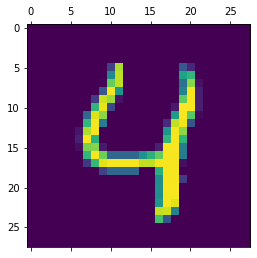

In [13]:
index_min = np.argmax(probs)
print(index_min)
print(f'Neural net prediction: {index_min}')
print(f'Actual: {y_test[show_index]}')
plt.matshow(x_test[show_index])